## Module 1 Homework (2025 cohort)

In this homework, we're going to download finance data from various sources and make simple calculations or analysis.

In [2]:
# # # install main library YFinance
# !pip install yfinance pandas_datareader

In [3]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import datetime

### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

In [4]:
df_sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [5]:
df_sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
df_sp500['Date added'] = pd.to_datetime(df_sp500['Date added'])
df_sp500['Year added'] = df_sp500['Date added'].dt.year
df_sp500[['Date added', 'Year added']].head()

,Date added,Year added
0,1957-03-04,1957
1,2017-07-26,2017
2,1957-03-04,1957
3,2012-12-31,2012
4,2011-07-06,2011


In [7]:
df_sp500.groupby('Year added').size().sort_values(ascending=False).iloc[0:2]

Year added
1957    53
2017    23
dtype: int64

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

In [8]:
df_sp500['duration_in_index'] = pd.to_datetime('today') - df_sp500['Date added']
df_sp500['duration_in_index_years'] = df_sp500['duration_in_index'].dt.days // 365

In [9]:
print('How many current S&P 500 stocks have been in the index for more than 20 years?: ', (df_sp500['duration_in_index_years'] > 20).sum())

How many current S&P 500 stocks have been in the index for more than 20 years?:  215


### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

In [10]:
# Define index symbols and friendly names
index_map = {
    "^GSPC": "USA - S&P 500",
    "000001.SS": "China - Shanghai Composite",
    "^HSI": "Hong Kong - Hang Seng",
    "^AXJO": "Australia - ASX 200",
    "^NSEI": "India - Nifty 50",
    "^GSPTSE": "Canada - TSX Composite",
    "^GDAXI": "Germany - DAX",
    "^FTSE": "UK - FTSE 100",
    "^N225": "Japan - Nikkei 225",
    "^MXX": "Mexico - IPC",
    "^BVSP": "Brazil - Ibovespa"
}

start_date = "2024-12-29"
end_date = "2025-05-02"

# Download auto-adjusted close prices
# With auto_adjust=True, the Close column is already adjusted
data = yf.download(list(index_map.keys()), start=start_date, end=end_date, auto_adjust=True)["Close"]
data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data
data.drop(index=['2024-12-30', '2024-12-31'], inplace=True)  # Remove the first row if it exists

[*********************100%***********************]  11 of 11 completed
/var/folders/bp/w2r8ph2j6yj3n7ntx5z4b88m0000gn/T/ipykernel_9866/990970253.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


In [11]:
# Calculate normalized returns (starting at 100 for each index)
normalized = data / data.iloc[1] * 100
normalized

Ticker,000001.SS,^AXJO,^BVSP,^FTSE,^GDAXI,^GSPC,^GSPTSE,^HSI,^MXX,^N225,^NSEI
Date,,,,,,,,,,,
2025-01-01,102.734107,99.486659,100.131530,98.945538,99.423114,100.222884,99.316814,102.225051,99.493763,100.000000,98.157194
2025-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2025-01-03,98.432792,100.601129,98.674714,99.562964,99.407830,101.259603,100.704876,100.697890,98.376454,100.000000,99.239724
2025-01-06,98.294654,101.064476,99.914256,99.874101,100.956467,101.820383,100.408871,100.331079,99.454155,98.527397,97.632776
2025-01-07,98.991069,101.023014,100.864100,99.820828,101.577606,100.689778,100.128124,99.104432,100.643624,100.473152,98.012498
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25,100.996120,97.158952,112.165661,101.878914,111.075289,94.149494,99.246927,112.013359,113.975473,89.500315,99.382765
2025-04-28,100.792445,97.511339,112.396254,101.903127,111.221213,94.209816,99.600770,111.968620,114.497942,89.836828,100.578162
2025-04-29,100.738499,98.407549,112.460354,102.462445,111.991065,94.756461,99.905615,112.152832,111.751647,89.836828,100.608958


In [12]:
# Final performance from Jan 1 to May 1
final_returns = ((data.iloc[-1] / data.iloc[0]) - 1) * 100
final_returns.index = final_returns.index.map(index_map)
final_returns.sort_values(ascending=False)

Ticker
Mexico - IPC                  13.624654
Germany - DAX                 12.998250
Brazil - Ibovespa             12.291014
Hong Kong - Hang Seng         10.266531
UK - FTSE 100                  3.961823
India - Nifty 50               2.490424
Canada - TSX Composite         0.273777
Australia - ASX 200           -0.165459
China - Shanghai Composite    -2.169961
USA - S&P 500                 -4.717906
Japan - Nikkei 225            -8.628345
dtype: float64

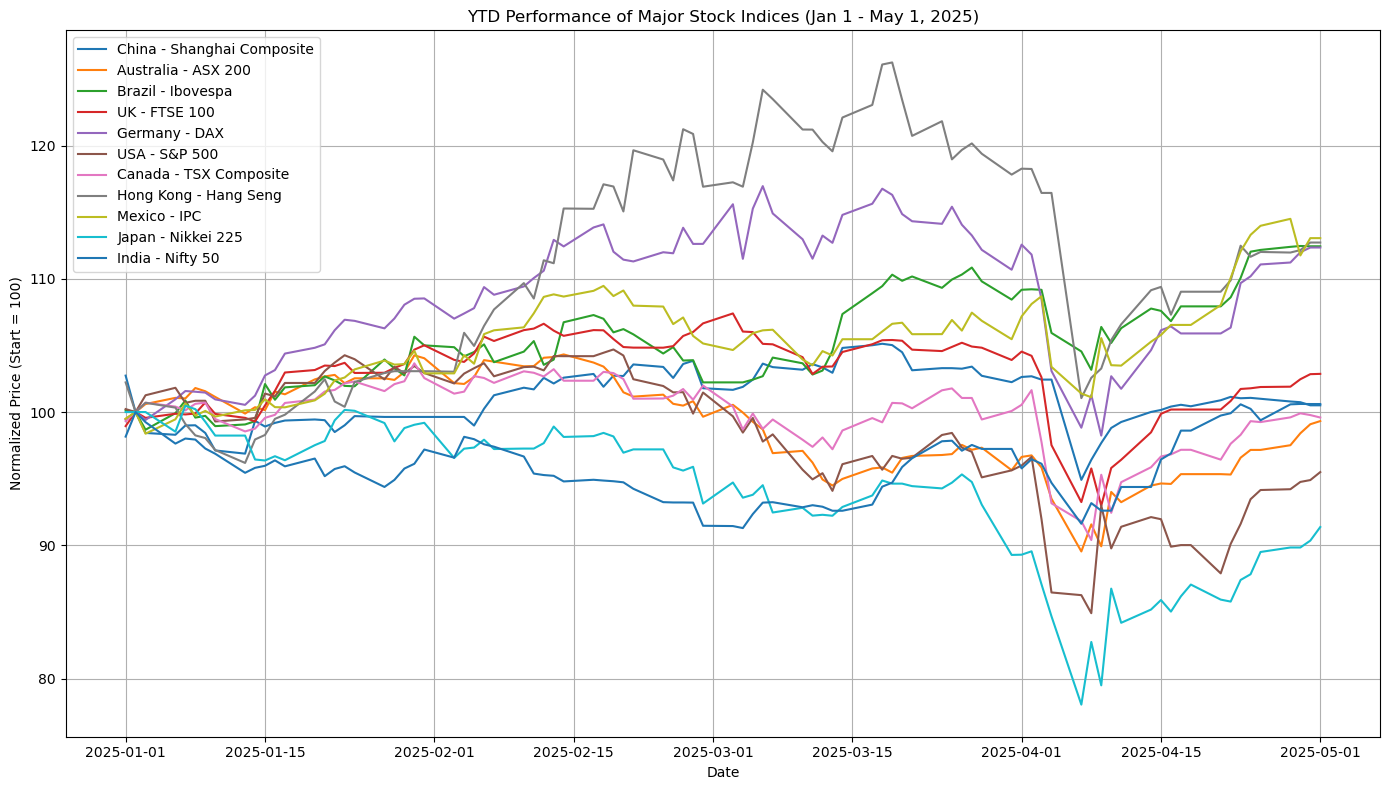

YTD Performance (Jan 1 - May 1, 2025):
Ticker
Mexico - IPC                  13.62%
Germany - DAX                  13.0%
Brazil - Ibovespa             12.29%
Hong Kong - Hang Seng         10.27%
UK - FTSE 100                  3.96%
India - Nifty 50               2.49%
Canada - TSX Composite         0.27%
Australia - ASX 200           -0.17%
China - Shanghai Composite    -2.17%
USA - S&P 500                 -4.72%
Japan - Nikkei 225            -8.63%
dtype: object


In [13]:
# Plot normalized performance
plt.figure(figsize=(14, 8))
for symbol in normalized.columns:
    plt.plot(normalized.index, normalized[symbol], label=index_map[symbol])
plt.title("YTD Performance of Major Stock Indices (Jan 1 - May 1, 2025)")
plt.ylabel("Normalized Price (Start = 100)")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final YTD returns
print("YTD Performance (Jan 1 - May 1, 2025):")
print(final_returns.sort_values(ascending=False).round(2).astype(str) + "%")

In [14]:
# Compute difference in performance relative to the US (S&P 500)
us_return = final_returns["USA - S&P 500"]
relative_performance = final_returns - us_return
relative_performance.name = "Difference vs. US (S&P 500)"

# Display sorted performance differences
comparison_df = pd.DataFrame({
    "YTD Return (%)": final_returns.round(2),
    "Diff vs US (%)": relative_performance.round(2)
}).sort_values("Diff vs US (%)", ascending=False)

print("\nComparison to US Market (S&P 500):")
print(comparison_df)


Comparison to US Market (S&P 500):
                            YTD Return (%)  Diff vs US (%)
Ticker                                                    
Mexico - IPC                         13.62           18.34
Germany - DAX                        13.00           17.72
Brazil - Ibovespa                    12.29           17.01
Hong Kong - Hang Seng                10.27           14.98
UK - FTSE 100                         3.96            8.68
India - Nifty 50                      2.49            7.21
Canada - TSX Composite                0.27            4.99
Australia - ASX 200                  -0.17            4.55
China - Shanghai Composite           -2.17            2.55
USA - S&P 500                        -4.72            0.00
Japan - Nikkei 225                   -8.63           -3.91


*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)

### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:* 
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

[*********************100%***********************]  1 of 1 completed


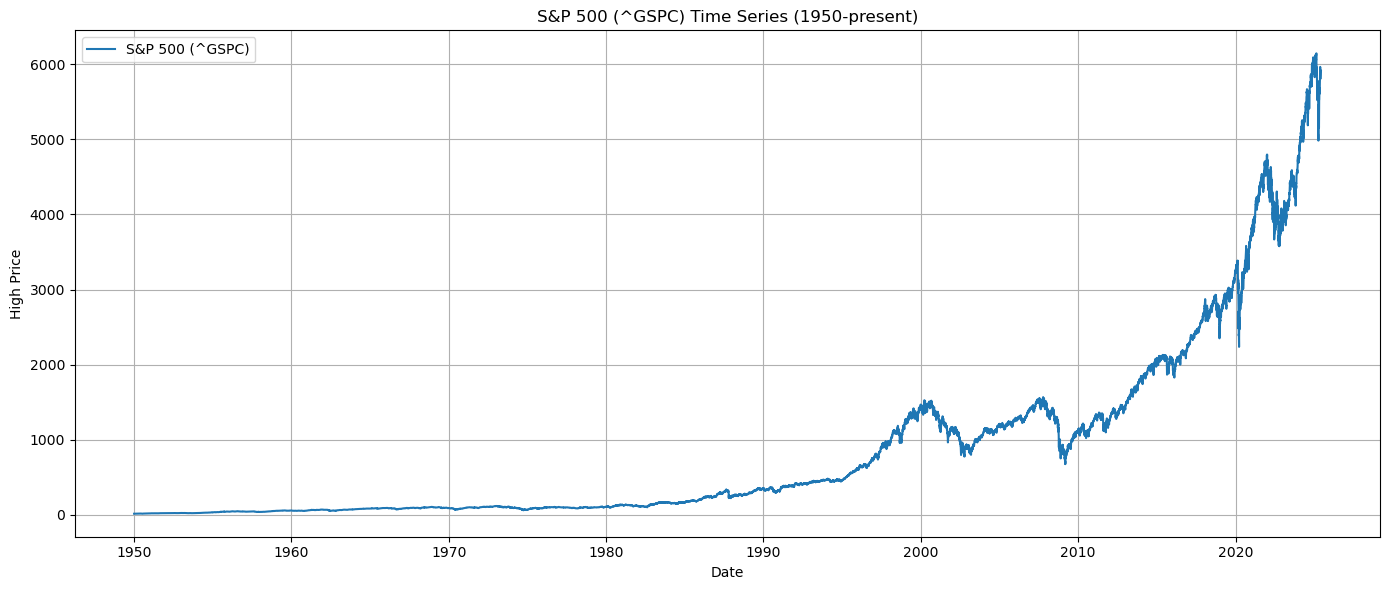

In [181]:
# Step 1: Download S&P 500 historical data from 1950
ticker = "^GSPC"
data = yf.download(ticker, start="1950-01-01", auto_adjust=True)["Close"]
#data = data.dropna()
data.columns = ['Close']



plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='S&P 500 (^GSPC)')
plt.title('S&P 500 (^GSPC) Time Series (1950-present)')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [183]:
# Step 2: Identify all-time highs
data['AllTimeHigh'] = data['Close'].cummax()
all_time_highs = data[data['Close'] == data['AllTimeHigh']]

In [189]:
# Step 3 & 4: Find drawdowns between consecutive ATHs
corrections = []
all_time_highs_list = all_time_highs.index.to_list()

for i in range(len(all_time_highs_list) - 1):
    start_date = all_time_highs_list[i]
    end_date = all_time_highs_list[i + 1]
    
    segment = data.loc[start_date:end_date]
    if segment.empty:
        continue
    min_date= segment['Close'].idxmin()
    min_price = segment.loc[min_date]['Close']
    
    peak_price = data.loc[start_date]['Close']
    drawdown_pct = ((peak_price - min_price) / peak_price) * 100
    
    if drawdown_pct > 5:
        duration = (min_date - start_date).days
        corrections.append({
            'Start': start_date,
            'Trough': min_date,
            'End': end_date,
            'Peak Price': peak_price,
            'Trough Price': min_price,
            'Drawdown (%)': drawdown_pct,
            'Duration (days)': duration
        })


In [190]:
# Convert to DataFrame
corrections_df = pd.DataFrame(corrections)

# Step 5: Summary statistics
percentiles = corrections_df['Duration (days)'].quantile([0.25, 0.5, 0.75])
median_duration = percentiles[0.5]

print("Correction Duration Percentiles (in days):")
print(percentiles)


Correction Duration Percentiles (in days):
0.25    21.5
0.50    39.0
0.75    89.0
Name: Duration (days), dtype: float64


*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

In [188]:
# Optional: Display top corrections by drawdown
print("\nTop 10 Corrections by Drawdown:")
display(corrections_df.sort_values(by='Drawdown (%)', ascending=False).head(10))


Top 10 Corrections by Drawdown:


,Start,Trough,End,Peak Price,Trough Price,Drawdown (%),Duration (days)
56,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,56.775388,517
54,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,49.146948,929
24,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,48.203593,630
22,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,36.061641,543
65,2020-02-19,2020-03-23,2020-08-18,3386.149902,2237.399902,33.924960,33
35,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,33.509515,101
15,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,27.973568,196
27,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,27.113582,622
68,2022-01-03,2022-10-12,2024-01-19,4796.560059,3577.030029,25.425097,282
18,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,22.177335,240


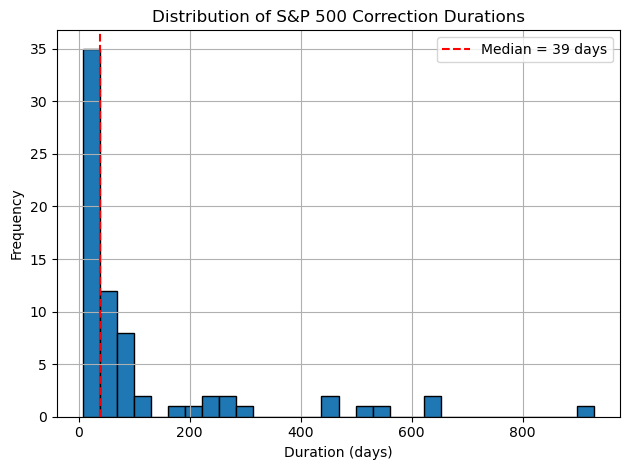

In [191]:
# Optional: Plot correction durations
plt.hist(corrections_df['Duration (days)'], bins=30, edgecolor='k')
plt.axvline(median_duration, color='red', linestyle='--', label=f'Median = {median_duration:.0f} days')
plt.title("Distribution of S&P 500 Correction Durations")
plt.xlabel("Duration (days)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:
1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
5. Calculate 2-day percentage changes following positive earnings surprises
6. Compare the median 2-day percentage change for positive surprises vs. all historical dates

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

In [241]:
# Step 1: Load earnings data
df_earnings = pd.read_csv("ha1_Amazon.csv", sep=';')

# Preprocess: Clean and convert earnings date
def parse_date(d):
    try:
        return pd.to_datetime(d.split(" at")[0])
    except:
        return pd.NaT

df_earnings["Earnings Date"] = df_earnings["Earnings Date"].apply(parse_date)
df_earnings = df_earnings.dropna(subset=["Earnings Date"])
df_earnings.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,2026-04-29,-,-,-
1,AMZN,Amazon.com Inc,2026-02-04,-,-,-
2,AMZN,Amazon.com Inc,2025-10-29,-,-,-
3,AMZN,Amazon.com Inc,2025-07-30,-,-,-
4,AMZN,"Amazon.com, Inc.",2025-05-01,???.36,???.59,+16.74


In [242]:
# Convert “Surprise (%)” strings (“-”, “+16.74”, etc.) to float, with “-” → NaN
def parse_surprise(val):
    if isinstance(val, str):
        val = val.strip()
        if val == "-" or val == "":
            return np.nan
        # Remove leading “+” if present, strip the “%” if present
        val = val.lstrip("+").rstrip("%").replace(",", ".")
        try:
            return float(val)
        except:
            return np.nan
    else:
        return np.nan
    
# Clean EPS Estimate and Reported EPS columns
def parse_eps(val):
    if isinstance(val, str):
        val = val.strip()
        val = val.replace("???", "0")
        try:
            return float(val)
        except:
            return np.nan
    return np.nan

    
    
df_earnings["Surprise (%)"] = df_earnings["Surprise (%)"].apply(parse_surprise)
df_earnings["EPS Estimate"] = df_earnings["EPS Estimate"].apply(parse_eps)
df_earnings["Reported EPS"] = df_earnings["Reported EPS"].apply(parse_eps)
df_earnings.head(10)

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,2026-04-29,NaN,NaN,NaN
1,AMZN,Amazon.com Inc,2026-02-04,NaN,NaN,NaN
2,AMZN,Amazon.com Inc,2025-10-29,NaN,NaN,NaN
3,AMZN,Amazon.com Inc,2025-07-30,NaN,NaN,NaN
4,AMZN,"Amazon.com, Inc.",2025-05-01,0.36,0.59,16.74
5,AMZN,"Amazon.com, Inc.",2025-02-06,0.49,0.86,24.47
6,AMZN,"Amazon.com, Inc.",2024-10-31,0.14,0.43,25.17
7,AMZN,"Amazon.com, Inc.",2024-08-01,1.00,0.26,22.58
8,AMZN,"Amazon.com, Inc.",2024-04-30,0.83,0.98,17.91
9,AMZN,"Amazon.com, Inc.",2024-02-01,0.80,1.00,24.55


In [243]:
# Keep only rows where Surprise (%) > 0
df_positive = df_earnings[df_earnings["Surprise (%)"] > 0].copy().dropna()
df_positive

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
4,AMZN,"Amazon.com, Inc.",2025-05-01,0.36,0.59,16.74
5,AMZN,"Amazon.com, Inc.",2025-02-06,0.49,0.86,24.47
6,AMZN,"Amazon.com, Inc.",2024-10-31,0.14,0.43,25.17
7,AMZN,"Amazon.com, Inc.",2024-08-01,1.00,0.26,22.58
8,AMZN,"Amazon.com, Inc.",2024-04-30,0.83,0.98,17.91
...,...,...,...,...,...,...
103,AMZN,"Amazon.com, Inc.",2000-07-26,-0.02,-0.02,6.20
104,AMZN,"Amazon.com, Inc.",2000-04-26,-0.02,-0.02,3.79
106,AMZN,"Amazon.com, Inc.",1999-10-27,-0.01,-0.01,7.54
107,AMZN,"Amazon.com, Inc.",1999-07-21,-0.01,-0.01,0.47


In [244]:
# Step 2: Download historical price data for AMZN
amzn = yf.download("AMZN", start="2005-01-01", progress=False)[["Close"]]
amzn = amzn.rename_axis("Date").reset_index()
amzn

Price,Date,Close
Ticker,,AMZN
0,2005-01-03,2.226000
1,2005-01-04,2.107000
2,2005-01-05,2.088500
3,2005-01-06,2.052500
4,2005-01-07,2.116000
...,...,...
5130,2025-05-23,200.990005
5131,2025-05-27,206.020004
5132,2025-05-28,204.720001


In [245]:
# Step 3: Compute 2-day percent changes for every trading date:
# Return = (Close on Day 3) / (Close on Day 1) – 1
amzn["Day1_Close"] = amzn["Close"]
amzn["Day3_Close"] = amzn["Close"].shift(-2)
amzn["2d_pct_change"] = (amzn["Day3_Close"] / amzn["Day1_Close"]) - 1

In [246]:
# Step 4 & 5: For each positive-earnings date, find the closest trading day ≥ that date,
# then pull its 2-day pct change
def find_next_trading_day(target_date, trading_series):
    future = trading_series[trading_series >= target_date]
    return future.min() if not future.empty else None

price_dates = amzn["Date"]
positive_changes = []

for _, row in df_positive.iterrows():
    earnings_date = row["Earnings Date"]
    day2 = find_next_trading_day(earnings_date, price_dates)
    if day2 is not None:
        idx = amzn.index[amzn["Date"] == day2]
        if len(idx) and idx[0] < len(amzn) - 2:  # ensure a 2-day window exists
            positive_changes.append(amzn.loc[idx[0], "2d_pct_change"])


In [247]:
# Step 6: Compare the median 2-day % change on all dates vs. after positive surprises
historical_median = amzn["2d_pct_change"].median()
positive_median = np.nanmedian(positive_changes)

print(f"Median 2-day % change on ALL trading dates: {historical_median:.4%}")
print(f"Median 2-day % change AFTER positive earnings surprises: {positive_median:.4%}")


Median 2-day % change on ALL trading dates: 0.1806%
Median 2-day % change AFTER positive earnings surprises: -1.9855%


*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)

In [240]:
# Optional: Correlation between surprise magnitude and return
returns_vs_surprise = []
for _, row in df_positive.iterrows():
    surprise = row["Surprise (%)"]
    earnings_date = row["Earnings Date"]
    day2 = find_next_trading_day(earnings_date, price_dates)
    if pd.notna(surprise) and day2 is not None:
        idx = amzn.index[amzn["Date"] == day2]
        if len(idx) and idx[0] < len(amzn) - 2:
            returns_vs_surprise.append((surprise, amzn.loc[idx[0], "2d_pct_change"]))

if returns_vs_surprise:
    df_corr = pd.DataFrame(returns_vs_surprise, columns=["Surprise (%)", "2d Return"])
    corr_value = df_corr.corr().loc["Surprise (%)", "2d Return"]
    print(f"Correlation between surprise magnitude and 2-day return: {corr_value:.2f}")

Correlation between surprise magnitude and 2-day return: nan


/var/folders/bp/w2r8ph2j6yj3n7ntx5z4b88m0000gn/T/ipykernel_9866/447541079.py:14: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

